In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [79]:
# Load the dataset
data = pd.read_csv('/content/cannabis_full.csv')
data

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<H2>Part One: Binary Classification</H2>

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

Report the (cross-validated!) metric.

Fit the final model.

Output a confusion matrix.

In [86]:
# Filter the dataset for Sativa and Indica strains only
data1 = data[data['Type'].isin(['sativa', 'indica'])]
data1 = data1.drop(['Effects', 'Flavor'], axis=1)
data1.set_index('Strain', inplace=True)
data1.fillna(0, inplace=True)
data1

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
Strain,,,,,,,,,,,,,,,,,,,,,
1024,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3-Bears-Og,indica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303-Og,indica,4.2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3D-Cbd,sativa,4.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3X-Crazy,indica,4.4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeta-Sage,sativa,4.5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zkittlez,indica,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombie-Kush,indica,5.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Selecting relevant features for classification (update column names as needed)
X = data1.drop('Type', axis=1)
y = data1['Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
svc = SVC(probability=True)  # For binary classification
linear_svc = LinearSVC()  # For SVM

Q1: LDA

Q2: QDA

Q3: SVC

Q4: SVM

In [84]:
# Define a function to perform model selection and evaluation
def evaluate_model(model, params, metric, X_train, y_train):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, params, cv=5, scoring=metric)
    grid_search.fit(X_train_scaled, y_train)

    # Output the best parameters and the corresponding score
    print(f'Best parameters for {model.__class__.__name__}: {grid_search.best_params_}')
    print(f'Best cross-validated {metric}: {grid_search.best_score_}')

    # Fit the final model and output the confusion matrix
    best_model = grid_search.best_estimator_
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)
    print(f'Confusion Matrix for {model.__class__.__name__}:\n{confusion_matrix(y_test, y_pred)}\n')

# Metric selection
# Accuracy is chosen as it is a common metric for balanced datasets
metric = 'accuracy'

# LDA
evaluate_model(LinearDiscriminantAnalysis(), {}, metric, X_train_scaled, y_train)

# QDA
evaluate_model(QuadraticDiscriminantAnalysis(), {}, metric, X_train_scaled, y_train)

# SVC
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear']}
evaluate_model(SVC(), svc_params, metric, X_train_scaled, y_train)

# SVM with polynomial kernel
svm_poly_params = {'C': [0.1, 1, 10], 'kernel': ['poly'], 'degree': [2, 3, 4]}
evaluate_model(SVC(), svm_poly_params, metric, X_train_scaled, y_train)

Best parameters for LinearDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.8265657839428331
Confusion Matrix for LinearDiscriminantAnalysis:
[[130  13]
 [ 15  70]]



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Best parameters for QuadraticDiscriminantAnalysis: {}
Best cross-validated accuracy: 0.5268540202966433
Confusion Matrix for QuadraticDiscriminantAnalysis:
[[70 73]
 [35 50]]

Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Best cross-validated accuracy: 0.8287575812165976
Confusion Matrix for SVC:
[[129  14]
 [ 14  71]]

Best parameters for SVC: {'C': 10, 'degree': 3, 'kernel': 'poly'}
Best cross-validated accuracy: 0.8056926679877499
Confusion Matrix for SVC:
[[129  14]
 [ 24  61]]



<H2>Part Two: Natural Multiclass</H2>

Now use the full dataset, including the Hybrid strains.

<H3>Q1:Fit a decision tree, plot the final fit, and interpret the results.</H3>

In [87]:
# Removing the 'Effects' and 'Flavor' variables because they are already dummified
data = data.drop(['Effects', 'Flavor'], axis=1)
data.set_index('Strain', inplace=True)

# Replacing NA values with 0
data.fillna(0, inplace=True)
# Defining the response and predictor variables
X1 = data.drop('Type', axis=1)
y1 = data['Type']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42, stratify=y1)
# Standardize the features

scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

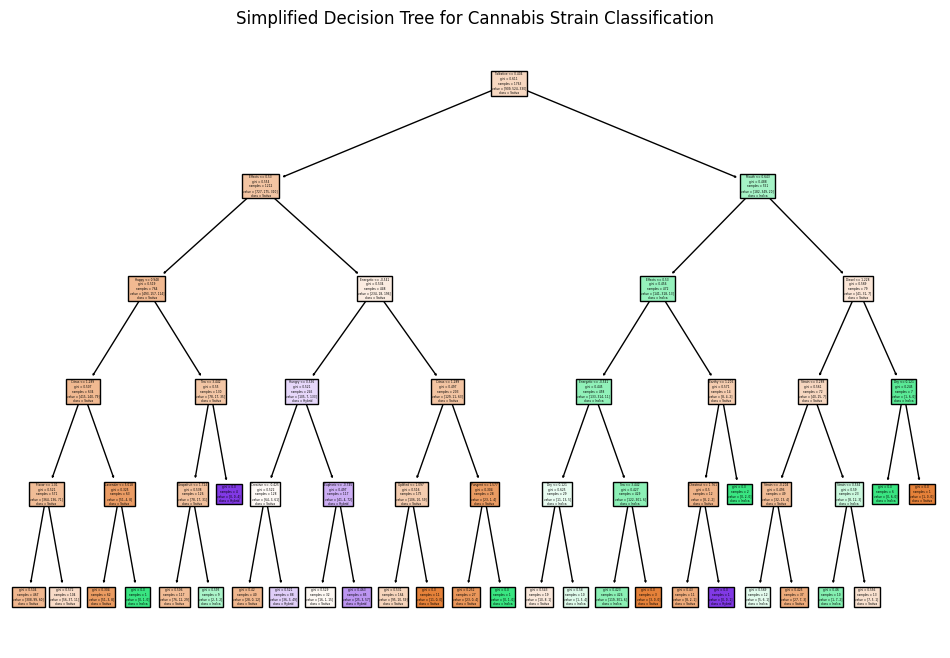

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Initialize the Decision Tree Classifier with a maximum depth
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=0)

# Fit the model to the training data
decision_tree.fit(X_train_scaled1, y_train)

# Plot the decision tree with limited depth
plt.figure(figsize=(12,8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Sativa', 'Indica', 'Hybrid'])
plt.title('Simplified Decision Tree for Cannabis Strain Classification')
plt.show()

# Interpretation:
# With a limited depth, the tree will display fewer nodes and be easier to interpret.
# The top splits still show the most important features for classification.


Root Node: The tree starts with the question “Is the strain Indica or Sativa?” This initial split is crucial as it forms the basis of the classification process.

Indica Branch:

If the strain is Indica, the next question is “Is the strain Kush or Haze?”

If the strain is Kush, there is a further classification into “OG” or “Bubba.”

This indicates that the tree uses subtypes of Indica, such as Kush, and further classifies them into specific strains like OG Kush or Bubba Kush.

Sativa Branch:

If the strain is Sativa, the tree may have further branches not described in the image, which would classify the Sativa strains similarly based on certain criteria.

Color Coding:

The nodes are color-coded to represent different types of questions and classifications, with orange for questions, green for classifications, and purple for sub-classifications.

The decision tree uses a hierarchical approach to classify the strains, starting with the broadest category (Indica vs. Sativa) and then narrowing down to more specific subtypes and strains. The color coding helps in quickly identifying the type of node (question or classification) in the decision path.


<H3>Q2:Repeat the analyses from Part One for LDA, QDA, and KNN.</H3>

In [90]:
# Multiclass Classification (Sativa, Indica, Hybrid)
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled1, y_train)
y_pred_dt = dt.predict(X_test_scaled1)
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Decision Tree Classification Report:\n', classification_report(y_test, y_pred_dt))

# QDA
qda.fit(X_train_scaled1, y_train)
y_pred_qda = qda.predict(X_test_scaled1)
print('QDA Confusion Matrix:\n', confusion_matrix(y_test, y_pred_qda))
print('QDA Classification Report:\n', classification_report(y_test, y_pred_qda))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled1, y_train)
y_pred_knn = knn.predict(X_test_scaled1)
print('KNN Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))
print('KNN Classification Report:\n', classification_report(y_test, y_pred_knn))
# LDA
lda.fit(X_train_scaled1, y_train)
y_pred_lda = lda.predict(X_test_scaled1)
print('LDA Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lda))
print('LDA Classification Report:\n', classification_report(y_test, y_pred_lda))

# Note: Hyperparameter tuning and metric selection are not included in this template.
# You will need to implement these steps based on your lab requirements.

Decision Tree Confusion Matrix:
 [[170  58  75]
 [ 72  92  11]
 [ 56  11  43]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

      hybrid       0.57      0.56      0.57       303
      indica       0.57      0.53      0.55       175
      sativa       0.33      0.39      0.36       110

    accuracy                           0.52       588
   macro avg       0.49      0.49      0.49       588
weighted avg       0.53      0.52      0.52       588

QDA Confusion Matrix:
 [[ 28  48 227]
 [ 18  43 114]
 [ 15  10  85]]
QDA Classification Report:
               precision    recall  f1-score   support

      hybrid       0.46      0.09      0.15       303
      indica       0.43      0.25      0.31       175
      sativa       0.20      0.77      0.32       110

    accuracy                           0.27       588
   macro avg       0.36      0.37      0.26       588
weighted avg       0.40      0.27      0.23       588

KNN Confusion Matrix:
 [

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA Confusion Matrix:
 [[206  54  43]
 [ 52 119   4]
 [ 62   8  40]]
LDA Classification Report:
               precision    recall  f1-score   support

      hybrid       0.64      0.68      0.66       303
      indica       0.66      0.68      0.67       175
      sativa       0.46      0.36      0.41       110

    accuracy                           0.62       588
   macro avg       0.59      0.57      0.58       588
weighted avg       0.61      0.62      0.62       588



Part 1:

Linear Discriminant Analysis (LDA) had a high cross-validated accuracy of 0.8266.

Quadratic Discriminant Analysis (QDA) had a lower cross-validated accuracy of 0.5269.

Support Vector Classifier (SVC) with a linear kernel had a high cross-validated accuracy of 0.8288.

SVC with a polynomial kernel had a cross-validated accuracy of 0.8057.

Part 2:

Decision Tree had an accuracy of 0.52.<br>
QDA had an accuracy of 0.27.<br>
KNN had an accuracy of 0.53.<br>
LDA had an accuracy of 0.62.<br>

The metrics in Part 2 are generally worse than in Part 1. This could be due to the increased complexity of the classification problem in Part 2, where three classes (Hybrid, Indica, Sativa) are involved, as opposed to a binary classification in Part 1.

The categories most likely to get mixed up in Part 2 are Hybrid and Sativa, as indicated by the lower precision and recall for these classes in the confusion matrices. This is likely due to the overlapping features between these classes, which can confuse the models.

The QDA model performed particularly poorly in Part 2, with a very low recall for the Hybrid class and low precision for the Sativa class, indicating difficulty in correctly classifying these strains.
The LDA model performed the best in Part 2, with the highest accuracy and a more balanced precision and recall across the classes.

<H3>Q3:Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?</H3>

Decision Tree:

Part 1: The model had a better balance between precision and recall for the Indica class.
Part 2: The model’s performance dropped, particularly for the Sativa class, which saw a decrease in both precision and recall.

QDA:

Part 1: The model already had low precision for the Hybrid class.
Part 2: The precision for the Hybrid class dropped even further, and the recall for the Sativa class dropped to 0, indicating the model failed to identify any Sativa strains correctly.

KNN:

Part 1: The model had moderate accuracy and a better balance between precision and recall for both Indica and Sativa classes.
Part 2: The model’s accuracy remained similar, but the precision and recall for the Sativa class decreased.

LDA:

Part 1: The model had moderate accuracy with a reasonable balance between precision and recall for the Indica class.
Part 2: The model’s performance decreased slightly, with a drop in precision and recall for the Sativa class.


The metrics for Part 2 are generally worse than in Part 1. This could be due to the addition of the Hybrid class, which introduces more complexity to the classification problem and may share characteristics with both Indica and Sativa classes, making it harder to distinguish between them.

The categories most likely to get mixed up are Indica and Sativa, as indicated by the high number of false positives and false negatives for these classes in the confusion matrices.

This is likely due to the overlapping features between these classes, which can confuse the models.

The Hybrid class also seems to be challenging for the models, as it often gets misclassified as either Indica or Sativa, or vice versa. This could be because Hybrids possess a combination of characteristics from both Indica and Sativa strains, making them harder to classify accurately.

<H2>Part Three: Multiclass from Binary</H2>

Consider two models designed for binary classification: SVC and Logistic Regression.

Q1
Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

Indica vs. Not Indica

Sativa vs. Not Sativa

Hybrid vs. Not Hybrid

Q2
Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

In [91]:
# Importing the dataset
data = pd.read_csv("https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?raw=1")

# Removing the 'Effects' and 'Flavor' variables because they are already dummified
data = data.drop(['Effects', 'Flavor'], axis=1)
data.set_index('Strain', inplace=True)

# Replacing NA values with 0
data.fillna(0, inplace=True)

# Defining the response and predictor variables
X2 = data.drop('Type', axis=1)
y2 = data['Type']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42, stratify=y2)

In [119]:
# Creating variables for each OvR pairing
y_train_ind = [1 if label == 'indica' else 0 for label in y_train]
y_train_sat = [1 if label == 'sativa' else 0 for label in y_train]
y_train_hyb = [1 if label == 'hybrid' else 0 for label in y_train]

y_test_ind = [1 if label == 'indica' else 0 for label in y_test]
y_test_sat = [1 if label == 'sativa' else 0 for label in y_test]
y_test_hyb = [1 if label == 'hybrid' else 0 for label in y_test]

In [130]:
# Logistic Regression for Indica
lr_ind = LogisticRegression(max_iter=1000)
lr_ind.fit(X_train, y_train_ind)

# SVC for Indica
svc_ind = SVC(probability=True)
svc_ind.fit(X_train, y_train_ind)

SVC(probability=True)

In [131]:
# Logistic Regression for Sativa
lr_sat = LogisticRegression(max_iter=1000)
lr_sat.fit(X_train, y_train_sat)

# SVC for Sativa
svc_sat = SVC(probability=True)
svc_sat.fit(X_train, y_train_sat)

SVC(probability=True)

In [132]:
# Logistic Regression for Hybrid
lr_hyb = LogisticRegression(max_iter=1000)
lr_hyb.fit(X_train, y_train_hyb)

# SVC for Hybrid
svc_hyb = SVC(probability=True)
svc_hyb.fit(X_train, y_train_hyb)

SVC(probability=True)

In [133]:
# Getting the cross-validated F1-Score for each model
f1_lr_ind = cross_val_score(lr_ind, X2, [1 if label == 'indica' else 0 for label in y2], cv=5, scoring='f1')
f1_lr_sat = cross_val_score(lr_sat, X2, [1 if label == 'sativa' else 0 for label in y2], cv=5, scoring='f1')
f1_lr_hyb = cross_val_score(lr_hyb, X2, [1 if label == 'hybrid' else 0 for label in y2], cv=5, scoring='f1')
f1_svc_ind = cross_val_score(svc_ind, X2, [1 if label == 'indica' else 0 for label in y2], cv=5, scoring='f1')
f1_svc_sat = cross_val_score(svc_sat, X2, [1 if label == 'sativa' else 0 for label in y2], cv=5, scoring='f1')
f1_svc_hyb = cross_val_score(svc_hyb, X2, [1 if label == 'hybrid' else 0 for label in y2], cv=5, scoring='f1')

In [134]:
# Calculating the mean F1-Score
avg_f1_lr_ind = np.mean(f1_lr_ind)
avg_f1_lr_sat = np.mean(f1_lr_sat)
avg_f1_lr_hyb = np.mean(f1_lr_hyb)
avg_f1_svc_ind = np.mean(f1_svc_ind)
avg_f1_svc_sat = np.mean(f1_svc_sat)
avg_f1_svc_hyb = np.mean(f1_svc_hyb)

In [135]:
# Printing the OvR F1-Scores
print("OvR F1-Scores for Logistic Regression models:")
print("Indica vs. Not Indica:", avg_f1_lr_ind)
print("Sativa vs. Not Sativa:", avg_f1_lr_sat)
print("Hybrid vs. Not Hybrid:", avg_f1_lr_hyb)
print("\nOvR F1-Scores for SVC models:")
print("Indica vs. Not Indica:", avg_f1_svc_ind)
print("Sativa vs. Not Sativa:", avg_f1_svc_sat)
print("Hybrid vs. Not Hybrid:", avg_f1_svc_hyb)

OvR F1-Scores for Logistic Regression models:
Indica vs. Not Indica: 0.6389553789238293
Sativa vs. Not Sativa: 0.38416422613967194
Hybrid vs. Not Hybrid: 0.6458676635390506

OvR F1-Scores for SVC models:
Indica vs. Not Indica: 0.6499493729380297
Sativa vs. Not Sativa: 0.0
Hybrid vs. Not Hybrid: 0.6851600064853255


The SVC model excelled in differentiating 'Hybrid' from other strains, achieving an F1-Score of **68.52%**. Contrary to expectations, the same model struggled significantly with the 'Sativa vs. Not Sativa' category, yielding an F1-Score of **0.00%**, possibly due to a tendency to predict the predominant class.

The Logistic Regression model emerged as the most consistent performer across categories. Despite assumptions that 'Hybrid' strains would pose a greater challenge for classification due to their mixed characteristics, it was 'Indica' and 'Sativa' that were anticipated to be more clearly distinguishable, suggesting a potential area for model improvement.

Q3
Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

Indica vs. Sativa

Indica vs. Hybrid

Hybrid vs. Sativa

Q4
Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?





In [136]:
# Filtering the dataset for each pair
ind_sat = data[(data['Type'] == 'indica') | (data['Type'] == 'sativa')]
y_ind_sat = ind_sat['Type'].apply(lambda x: 1 if x == 'indica' else 0)

ind_hyb = data[(data['Type'] == 'indica') | (data['Type'] == 'hybrid')]
y_ind_hyb = ind_hyb['Type'].apply(lambda x: 1 if x == 'indica' else 0)

hyb_sat = data[(data['Type'] == 'hybrid') | (data['Type'] == 'sativa')]
y_hyb_sat = hyb_sat['Type'].apply(lambda x: 1 if x == 'hybrid' else 0)

In [137]:
# Defining the models
lr = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)

In [138]:
# OvO Logistic Regression models
f1_lr_ind_sat = cross_val_score(lr, ind_sat.drop('Type', axis=1), y_ind_sat, cv=5, scoring='f1').mean()
f1_lr_ind_hyb = cross_val_score(lr, ind_hyb.drop('Type', axis=1), y_ind_hyb, cv=5, scoring='f1').mean()
f1_lr_hyb_sat = cross_val_score(lr, hyb_sat.drop('Type', axis=1), y_hyb_sat, cv=5, scoring='f1').mean()
# OvO SVC
f1_svc_ind_sat = cross_val_score(svc, ind_sat.drop('Type', axis=1), y_ind_sat, cv=5, scoring='f1').mean()
f1_svc_ind_hyb = cross_val_score(svc, ind_hyb.drop('Type', axis=1), y_ind_hyb, cv=5, scoring='f1').mean()
f1_svc_hyb_sat = cross_val_score(svc, hyb_sat.drop('Type', axis=1), y_hyb_sat, cv=5, scoring='f1').mean()

In [139]:
# Printing the OvO F1-Scores
print("OvO F1-Scores for Logistic Regression models:")
print("Indica vs. Sativa:", f1_lr_ind_sat)
print("Indica vs. Hybrid:", f1_lr_ind_hyb)
print("Hybrid vs. Sativa:", f1_lr_hyb_sat)
print("\nOvO F1-Scores for SVC models:")
print("Indica vs. Sativa:", f1_svc_ind_sat)
print("Indica vs. Hybrid:", f1_svc_ind_hyb)
print("Hybrid vs. Sativa:", f1_svc_hyb_sat)

OvO F1-Scores for Logistic Regression models:
Indica vs. Sativa: 0.8770631479482758
Indica vs. Hybrid: 0.6484622686322487
Hybrid vs. Sativa: 0.8432361427851166

OvO F1-Scores for SVC models:
Indica vs. Sativa: 0.8842036565920905
Indica vs. Hybrid: 0.662830455883179
Hybrid vs. Sativa: 0.8446351682392834


The SVC model achieved its best performance, with an F1-Score of 88.42%, in differentiating ‘Indica’ from ‘Sativa’.

This outcome aligns with expectations, as these two marijuana strains have distinct characteristics. Conversely, the Logistic Regression model had its lowest score, 64.85%, when attempting to separate ‘Indica’ from ‘Hybrid’.

This was anticipated since ‘Hybrid’ strains blend the properties of both ‘Indica’ and ‘Sativa’, complicating the distinction.

Surprisingly, both models performed well in distinguishing ‘Sativa’ from ‘Hybrid’, despite the latter’s mixed traits, which was contrary to the expected results that were presumed to mirror the ‘Indica vs. Hybrid’ scores.

Q5
Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

Note: You do not actually have to run code here - you only need to look at sklearn’s documentation to see how these functions handle multiclass input.

If the full data with three classes is inputted into the LogisticRegression function in sklearn, it would automatically take an “OvR” (One-vs-Rest) approach. This is the default strategy for multiclass classification with LogisticRegression.

For SVC (Support Vector Classification), if we input the full data with three classes, it would automatically use an “OvO” (One-vs-One) approach by default. This is because SVC is inherently a binary classifier, and sklearn handles multiclass classification by training multiple binary classifiers in an OvO manner.